## Step 1: Load Video
* Import necessary libraries (e.g., OpenCV, numpy, matplotlib).
* Load the video file using OpenCV's cv2.VideoCapture function.
* Checking if the video is loaded successfully and retrieve video properties like frame count, frame width, and height.

In [1]:
import cv2

# Load video
video_path = r"/content/videoplayback.mp4"
cap = cv2.VideoCapture(video_path)

# Verify video load
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(f"Video loaded: {frame_count} frames, {fps} FPS, {width}x{height}")


Video loaded: 503 frames, 25.0 FPS, 600x480


## Step 2: Frame Extraction
* Loop through each frame in the video.
* Extract frames and store them in a list for processing.

In [2]:
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()
print(f"Extracted {len(frames)} frames from the video.")


Extracted 503 frames from the video.


In [3]:
frames

[array([[[  0,  13,   0],
         [  0,  13,   0],
         [  0,  13,   0],
         ...,
         [  0,   4,   0],
         [  0,   4,   0],
         [  0,   4,   0]],
 
        [[101, 146, 128],
         [101, 146, 128],
         [101, 146, 128],
         ...,
         [121, 151, 129],
         [121, 151, 129],
         [121, 151, 129]],
 
        [[ 76, 121, 103],
         [ 76, 121, 103],
         [ 76, 121, 103],
         ...,
         [ 85, 123,  99],
         [ 85, 123,  99],
         [ 85, 123,  99]],
 
        ...,
 
        [[  2,   0,   0],
         [  2,   0,   0],
         [  2,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  2,   0,   0],
         [  2,   0,   0],
         [  2,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  2,   0,   0],
         [  2,   0,   0],
         [  2,   0,   0],
         ...,
         [  0,   0,   0],
  

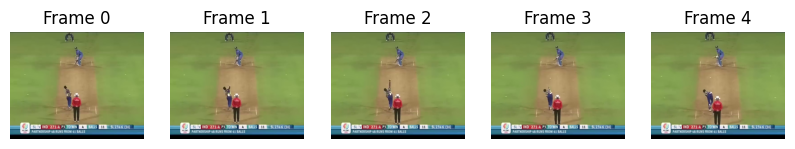

In [5]:
import cv2
import matplotlib.pyplot as plt # Import matplotlib.pyplot and assign it to plt

# Load video
# ... (Rest of your video loading code) ...

# Display sample frames
plt.figure(figsize=(10, 5))
for i in range(5):  # Display first 5 frames as examples
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {i}")
    plt.axis('off')
plt.show()

## Step 3: Spatio-Temporal Segmentation
* Applying color thresholding or edge detection for segmenting each frame.
* Identifying foreground and background regions based on frame differences.
* Track segmented objects across frames by using bounding boxes or contour detection.

In [6]:
segmented_frames = []
for frame in frames:
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Store segmented frame
    segmented_frames.append(thresh)


In [7]:
segmented_frames

[array([[  0,   0,   0, ...,   0,   0,   0],
        [255, 255, 255, ..., 255, 255, 255],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [255, 255, 255, ..., 255, 255, 255],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [255, 255, 255, ..., 255, 255, 255],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [255, 255, 255, ..., 255, 255, 255],
        [  0,   

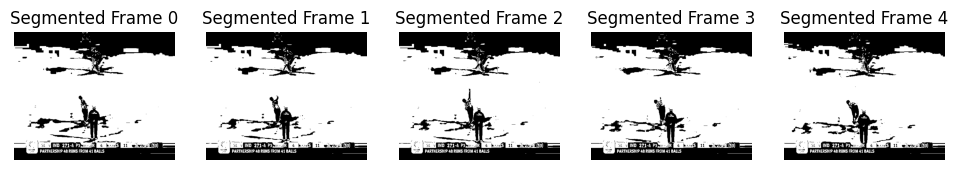

In [8]:
# Display segmented frames
plt.figure(figsize=(12, 5))
for i in range(5):  # Display the first 5 segmented frames
    plt.subplot(1, 5, i+1)
    plt.imshow(segmented_frames[i], cmap='gray')
    plt.title(f"Segmented Frame {i}")
    plt.axis('off')
plt.show()

## Step 4: Track Consistent Regions Across Frames
* For each frame, compare segmented regions to track motion and shape changes.
* Identify stable areas that represent the background, while varying regions signify foreground elements.

In [9]:
consistent_regions = []
for i in range(1, len(segmented_frames)):
    # Calculate frame difference to track motion
    frame_diff = cv2.absdiff(segmented_frames[i-1], segmented_frames[i])

    # Mark regions with no motion as background
    background = cv2.bitwise_not(frame_diff)
    consistent_regions.append(background)


In [10]:
consistent_regions

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

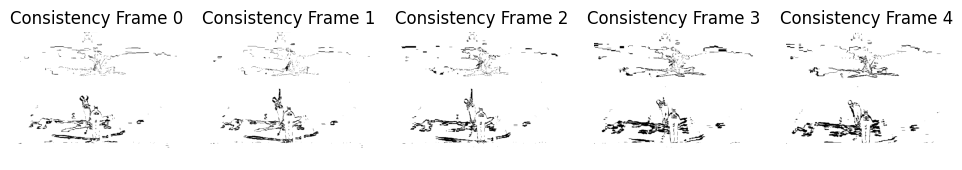

In [17]:
# Display tracked consistent regions
plt.figure(figsize=(12, 5))
for i in range(5):  # Display every 5th consistent region frame
    plt.subplot(1, 5, i+1)
    plt.imshow(consistent_regions[i], cmap='gray')
    plt.title(f"Consistency Frame {i}")
    plt.axis('off')
plt.show()

## Step 5: Scene Cut Detection
* Use pixel-based or histogram-based comparisons to detect scene cuts.
* Calculate pixel or intensity differences between consecutive frames to identify hard cuts.
* For soft cuts, analyze gradual changes over multiple frames.

In [11]:
scene_cuts = []
for i in range(1, len(frames)):
    # Calculate histogram difference
    hist1 = cv2.calcHist([frames[i-1]], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frames[i]], [0], None, [256], [0, 256])

    # Use correlation or Euclidean distance for comparison
    hist_diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    if hist_diff < 0.7:  # Threshold for hard cut
        scene_cuts.append(i)


In [12]:
scene_cuts

[69]

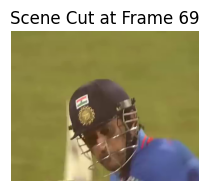

In [13]:
# Display frames where scene cuts are detected
plt.figure(figsize=(14, 5))
for j, cut in enumerate(scene_cuts[:5]):  # Display first 5 cuts
    plt.subplot(1, 5, j+1)
    plt.imshow(cv2.cvtColor(frames[cut], cv2.COLOR_BGR2RGB))
    plt.title(f"Scene Cut at Frame {cut}")
    plt.axis('off')
plt.show()

## Step 6: Mark Scene Cuts
* Highlight detected frames where scene cuts are detected.
* Create a summary displaying detected scene boundaries.

In [14]:
scene_cut_summary = [frames[i] for i in scene_cuts]
print(f"Scene cuts detected at frames: {scene_cuts}")


Scene cuts detected at frames: [69]


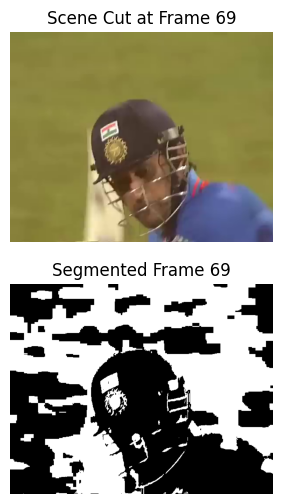

In [15]:
# Summary of detected scene cuts and segmentation
summary_frames = scene_cuts[:5]  # Show first 5 scene cuts for visualization

plt.figure(figsize=(15, 6))
for i, idx in enumerate(summary_frames):
    plt.subplot(2, len(summary_frames), i + 1)
    plt.imshow(cv2.cvtColor(frames[idx], cv2.COLOR_BGR2RGB))
    plt.title(f"Scene Cut at Frame {idx}")
    plt.axis('off')

    plt.subplot(2, len(summary_frames), i + 1 + len(summary_frames))
    plt.imshow(segmented_frames[idx], cmap='gray')
    plt.title(f"Segmented Frame {idx}")
    plt.axis('off')
plt.show()


## Step 7: Result Visualization
* Display frames with scene cuts and segmentation results for selected frames.
* Use matplotlib or OpenCV's imshow to visualize segmentation and scene-cut detection results.

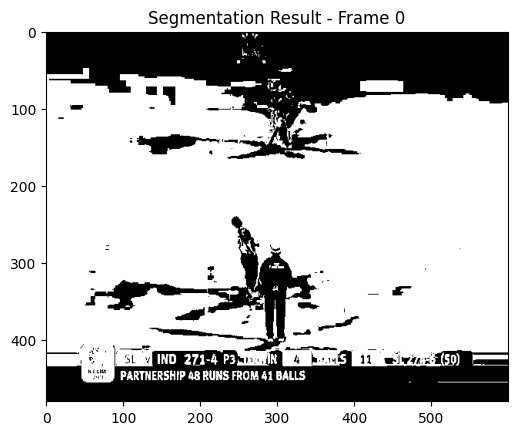

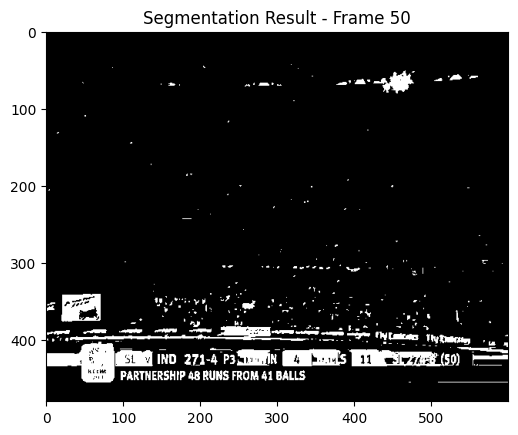

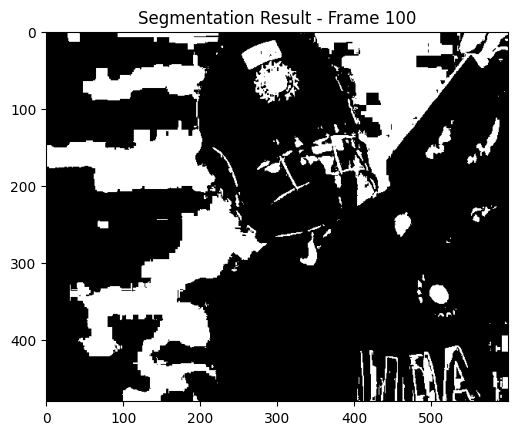

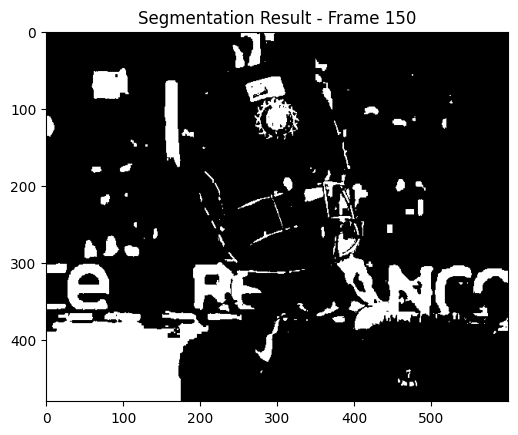

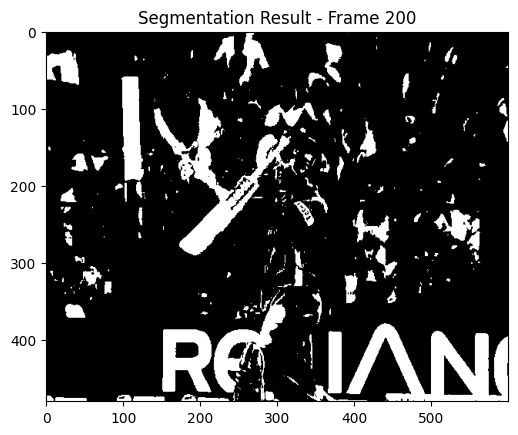

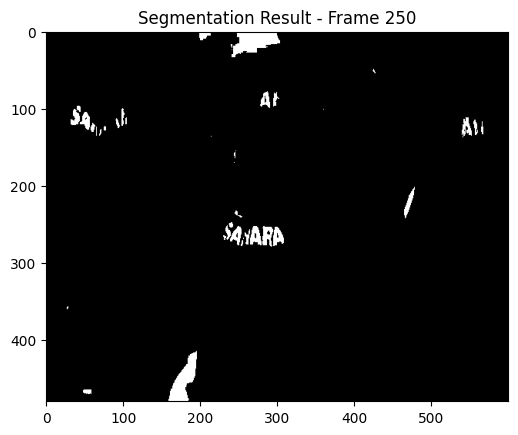

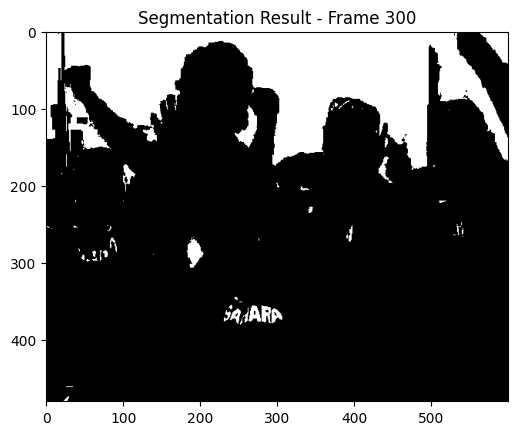

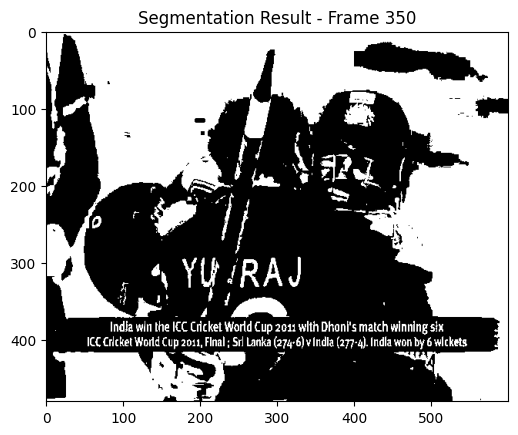

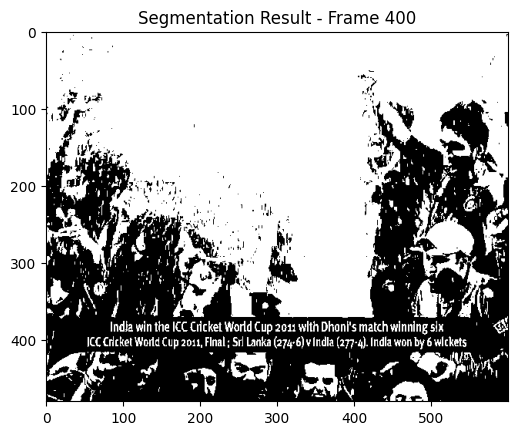

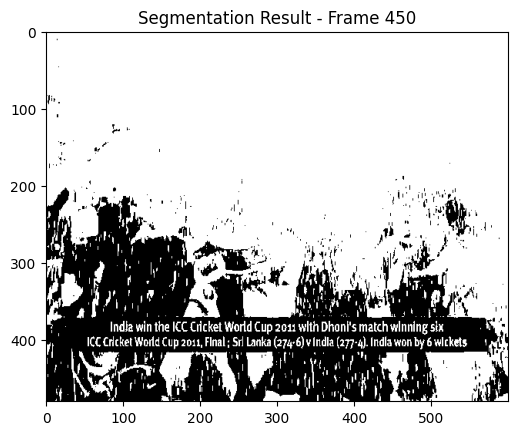

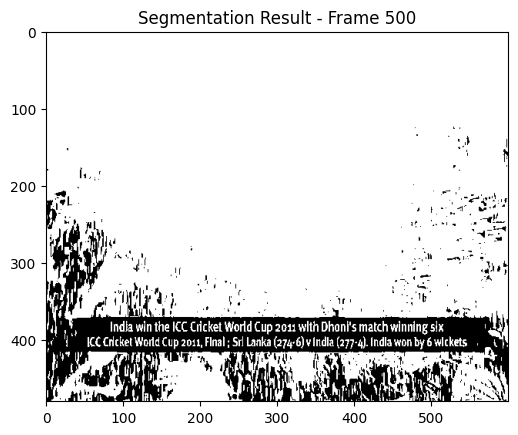

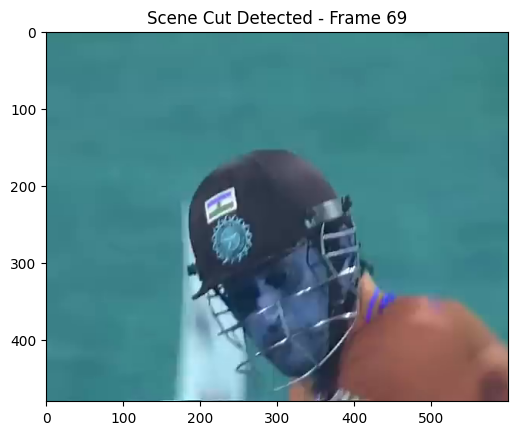

In [16]:
import matplotlib.pyplot as plt

# Display segmentation result
for i in range(0, len(segmented_frames), 50):  # Display every 50th frame for brevity
    plt.imshow(segmented_frames[i], cmap='gray')
    plt.title(f'Segmentation Result - Frame {i}')
    plt.show()

# Display frames with scene cuts
for cut in scene_cuts:
    plt.imshow(frames[cut])
    plt.title(f'Scene Cut Detected - Frame {cut}')
    plt.show()
